<a href="https://colab.research.google.com/github/martinjamouss/ML-Lab/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import an asset price from Yahoo Finance

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import Activation
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error , accuracy_score

########################################
####Pick your ticker and time period####
########################################
stock_data = yf.download("AAPL", start="1990-01-01", end="2022-02-21")

# Preprocess data
scaled_data = np.array(stock_data["Close"].pct_change().dropna()).reshape(-1,1)

# Split data into training and test sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len:, :]

[*********************100%***********************]  1 of 1 completed


# 2.) Create your x_train/y_train data so that your RNN uses percentage change data to make a binary forecast where the stock moves up or down the next day
# Build an RNN Architecture accordingly

In [3]:
x_train = []
y_train = []

####Pick your input size and edit to make binary forecast####
input_size = 5
for i in range(input_size, len(train_data)):
    x_train.append(train_data[i-input_size:i, 0])
    if train_data[i, 0] > 0:
        y_train.append(1)
    else:
        y_train.append(0)

# Convert to numpy arrays and reshape for LSTM input
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train_binary = (y_train > 0.5).astype(int)

In [4]:
###################################
####Build Your RNN Architecture####
###################################
model = Sequential()
model.add(LSTM(x_train.shape[1], return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu'))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
324/324 [==============================] - 13s 17ms/step - loss: 0.2500 - accuracy: 0.5022
Epoch 2/10
324/324 [==============================] - 5s 14ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 3/10
324/324 [==============================] - 5s 16ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 4/10
324/324 [==============================] - 6s 17ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 5/10
324/324 [==============================] - 4s 11ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 6/10
324/324 [==============================] - 3s 9ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 7/10
324/324 [==============================] - 3s 10ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 8/10
324/324 [==============================] - 3s 9ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 9/10
324/324 [==============================] - 3s 8ms/step - loss: 0.2500 - accuracy: 0.5025
Epoch 10/10
324/324 [==============================] - 3s 8ms/step - loss: 0.2500 - accuracy:

# 3.) Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [5]:
# Normalize the data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)

# Generate predicted outputs for test data
x_test = []
y_test = []
for i in range(input_size, len(test_data)):
    x_test.append(test_data_normalized[i-input_size:i, 0])
    if test_data_normalized[i, 0] > 0:
        y_test.append(1)
    else:
        y_test.append(0)
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test_binary = (y_test > 0.5).astype(int)
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracies
in_sample_acc = accuracy_score(y_train_binary, model.predict(x_train).round())
in_sample_rw_acc = accuracy_score(y_train_binary[1:], (train_data_normalized[input_size:-1, 0] > 0).astype(int))
out_of_sample_acc = accuracy_score(y_test_binary, y_pred_binary)
out_of_sample_rw_acc = accuracy_score(y_test_binary[1:], (test_data_normalized[input_size:-1, 0] > 0).astype(int))

203/203 [==============================] - 1s 3ms/step


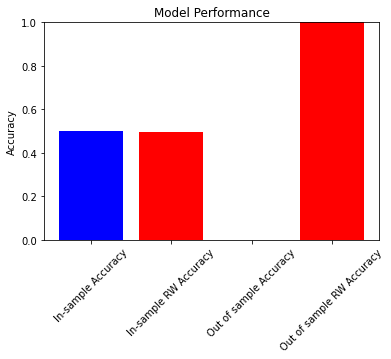

In [6]:
# Create bar chart
labels = ['In-sample Accuracy', 'In-sample RW Accuracy', 'Out of sample Accuracy', 'Out of sample RW Accuracy']
values = [in_sample_acc, in_sample_rw_acc, out_of_sample_acc, out_of_sample_rw_acc]
colors = ['blue', 'r', 'blue', 'r']
plt.bar(labels, values, color=colors)
plt.ylim(0, 1)
plt.title('Model Performance')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.show()

# 4.) Plot in and out of sample accuracy

In [7]:
# # Make predictions on full dataset

# test_predict = model.predict(x_test)
# test_predictions = (test_predict+1).reshape(1,-1) * np.cumprod(y_test+1)

# train_predict = model.predict(x_train)
# train_predictions = (train_predict+1).reshape(1,-1) * np.cumprod(y_train+1)

# plt.plot(stock_data[:training_data_len- input_size].index, np.cumprod(y_train+1), label="Training Data")
# plt.plot(stock_data[:training_data_len- input_size].index, train_predictions[0], label="Training Predictions")
# end_val = np.cumprod(y_train+1)[-1]
# test_predict = model.predict(x_test)
# test_predictions = (test_predict+1).reshape(1,-1) * (np.cumprod((y_test+1))*end_val)
# plt.plot(stock_data[training_data_len+1:].index, np.cumprod((y_test+1))*end_val,label="Test Data")
# plt.plot(stock_data[training_data_len+1:].index, test_predictions[0], label="Test Predictions")
# plt.xlabel("Date")
# plt.ylabel("Stock Price")
# plt.legend()
# plt.show()

#5.) Write an observation/conclusion about the graphs from Q4 and Q3

A model with high in-sample accuracy means that it fits the training data well. However, this does not necessarily imply good performance on new data, which is clearly the case here. An out-of-sample RW of 1  suggests that the model does not provide any useful information beyond what can be obtained from a random walk model.

#6.)Test your model and compare insample Accurracy, insample random walk assumption Accuracy, Out of sample Accuracy and out of sample random walk assumption Accuracy using a bar chart

In [8]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(model.layers[0].input_shape)
print(model.layers[0].output_shape)


x_train shape: (6472, 5, 1)
y_train shape: (6472,)
(None, 5, 1)
(None, 5, 5)


In [9]:
import itertools
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a list of input sizes to try
input_sizes = [3, 5, 7, 10]

# Define a function to build and compile the LSTM model
def build_model(input_size):
    model = Sequential()
    model.add(LSTM(input_size, return_sequences=True, input_shape=(input_size, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(input_size, return_sequences=False, input_shape=(input_size, 1)))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=["accuracy"])
    return model

# Create an instance of GridSearchCV with the parameter grid and model builder function
estimator = KerasClassifier(build_fn=build_model, epochs=1, batch_size=20, verbose=0)
param_grid = dict(input_size=input_sizes)
grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5)

# Fit the GridSearchCV instance on the training data
grid_search.fit(x_train, y_train)

# Print the best input size and corresponding mean test score
print('Best input size:', grid_search.best_params_['input_size'])
print('Best mean test score:', grid_search.best_score_)


<ipython-input-9-124ab9278d69>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=build_model, epochs=1, batch_size=20, verbose=0)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  F

Best input size: 5
Best mean test score: 0.4862475454807281
